# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [286]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [287]:
# Read the Mapbox API key
load_dotenv("APIKeys.env")
map_box_api = os.getenv("mbapi")
map_box_api

'pk.eyJ1IjoianNlaWRtYW4zMCIsImEiOiJja3NxOGNlbmQwYWE3MnZvM2JnaHJsamRoIn0.WHIiDArAKXnm4CFvwGH0Ow'

In [288]:
px.set_mapbox_access_token(map_box_api)

# Import Data

In [289]:
# Import the necessary CSVs to Pandas DataFrames
file_path = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

neigh_file_path = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/Data/neighborhoods_coordinates.csv")
neighcoords= pd.read_csv(neigh_file_path)


In [290]:
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [291]:
sfo_data = pd.read_csv(file_path)
sfo_data

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [302]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    file_path = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/Data/sfo_neighborhoods_census_data.csv")
    sfo_data = pd.read_csv(file_path, index_col="year")    
    sales10 = sfo_data['housing_units'].groupby('year').mean()
    yaxis=[370000,387500]

    return (sales10.plot(kind="bar",ylim=yaxis))

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    file_path = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/Data/sfo_neighborhoods_census_data.csv")
    sfo_data = pd.read_csv(file_path, index_col="year")
    sfprice = sfo_data
    sfprice.reset_index(inplace=True)
    sfpriceforrent = sfprice['gross_rent'].groupby(sfprice["year"]).mean()
    return (sfpriceforrent.plot())

def average_sales_price():
    """Average Sales Price Per Year."""
    
    file_path = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/Data/sfo_neighborhoods_census_data.csv")
    sfo_data = pd.read_csv(file_path, index_col="year")    
    sfsales = sfo_data
    sfsales.reset_index(inplace=True)
    sfsalesprices = sfsales["sale_price_sqr_foot"].groupby(sfsales["year"]).mean()
    return (sfsales.plot())

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    file_path = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/Data/sfo_neighborhoods_census_data.csv")
    sfo_data = pd.read_csv(file_path, index_col="year")    
    sfforavgprice = sfo_data
    sfforavgprice.reset_index(inplace=True)
    return (sfforavgprice.hvplot(kind="line",x="year",y="sale_price_sqr_foot",groupby="neighborhood"))

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    file_path = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/Data/sfo_neighborhoods_census_data.csv")
    sfo_data = pd.read_csv(file_path, index_col="year")    
    topmost = sfo_data
    topmost.reset_index(inplace=True)
    topmost.drop(columns='year',inplace=True)

    sfsqftNOText = sfo_data[['neighborhood','sale_price_sqr_foot']]
    sales10NOText = sfo_data['housing_units']
    sfpriceNOText = sfo_data['gross_rent']

    sfallNOText = pd.concat([sfsqftNOText,sales10NOText,sfpriceNOText] , axis = "columns" , join="inner")
    columnames=['neighborhood',"sale_price_sqr_foot","housing_units","gross_rent"]
    sfallNOText.columns=columnames
    
    grouper = ["neighborhood"]

    sftop10= sfallNOText.groupby(grouper).mean()

    sftop10 = sftop10.sort_values(['sale_price_sqr_foot'],ascending=False)

    #sf10top10.reset_index(inplace=True)
    return (sf10top10.plot(kind='bar',x="neighborhood",y='sale_price_sqr_foot'))


def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    file_path = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/Data/sfo_neighborhoods_census_data.csv")
    sfo_data = pd.read_csv(file_path, index_col="year")
    sfo_data.reset_index(inplace=True)

    sfowns = sfo_data

    sfowns = sfowns.groupby("neighborhood").mean()

    sfowns["year"] = sfowns["year"].round(0).astype(int)

    sfowns.reset_index(inplace=True)
    
    return (sfowns.hvplot.bar(x="year",y=["sale_price_sqr_foot","gross_rent"],groupby="neighborhood"))

    

def neighborhood_map():
        #"""Neighborhood Map."""

    file_path = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/Data/sfo_neighborhoods_census_data.csv")
    sfo_data = pd.read_csv(file_path, index_col="year")    
    neigh_file_path = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/Data/neighborhoods_coordinates.csv")
    neighcoords= pd.read_csv(neigh_file_path)

    allbyneigh = sfo_data
    allbyneigh.reset_index(inplace=True)
    allbyneigh=allbyneigh.groupby(allbyneigh["neighborhood"]).mean()
    allbyneigh["year"]=allbyneigh["year"].round(0).astype(int)  
    neighcoords.set_index("Neighborhood",inplace=True)
    sfwithcoords = pd.concat([allbyneigh,neighcoords] , axis = 'columns' , join="inner")
    sfrealmap = px.scatter_mapbox(sfwithcoords,
                        lat=sfwithcoords['Lat'],
                        lon=sfwithcoords['Lon'],
                        zoom=10.5,
                        color=sfwithcoords['gross_rent'],
                        size=sfwithcoords['sale_price_sqr_foot']
                        )
    return (sfrealmap.show())

    
#def parallel_coordinates():
    #"""Parallel Coordinates Plot."""

    # YOUR CODE HERE!



#def parallel_categories():
    #"""Parallel Categories Plot."""
    
    # YOUR CODE HERE!


#def sunburst():
    #"""Sunburst Plot."""
    
    # YOUR CODE HERE!


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

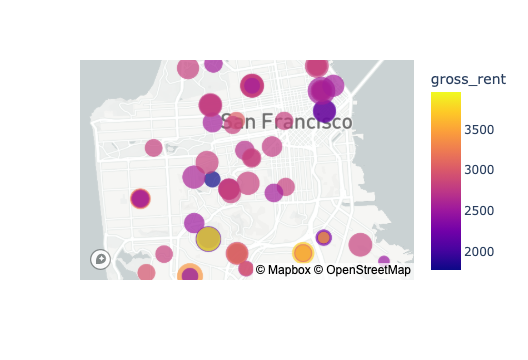

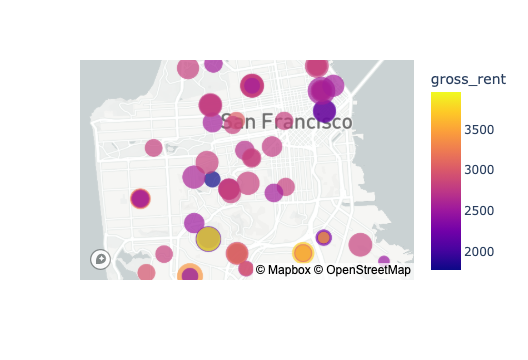

TypeError: 'Tabs' object is not callable

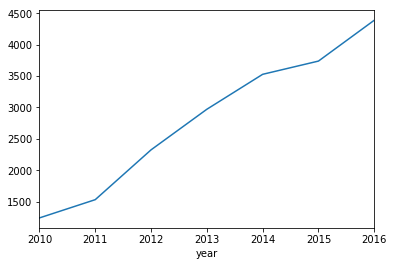

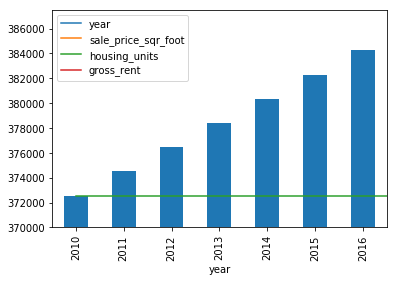

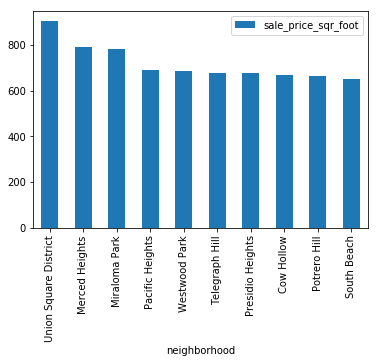

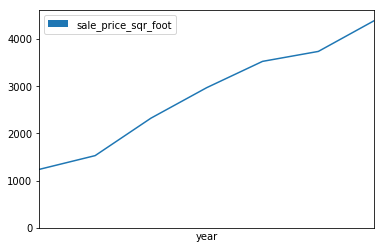

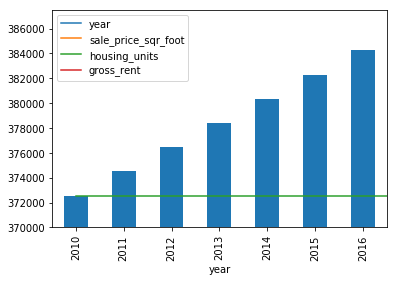

In [303]:
# Create a Title for the Dashboard

title = pn.pane.Markdown("some pointless title about SF")
    

# Create a tab layout for the dashboard

tabs = pn.Tabs(
    (average_price_by_neighborhood()),
    (average_gross_rent()),
    (average_sales_price()),
    (housing_units_per_year()),
    (top_most_expensive_neighborhoods()),
    (most_expensive_neighborhoods_rent_sales()),
    (neighborhood_map())
)

sfdash = tabs(
    ("welcome",top_most_expensive_neighborhoods(),most_expensive_neighborhoods_rent_sales()),
    ("yearly",average_price_by_neighborhood(),average_gross_rent(),average_sales_price(),housing_units_per_year()),
    ("neighborhood heatmap",neighborhood_map())
)
        
# Create the dashboard

thedashboard = sfdash.pn.pane


## Serve the Panel Dashboard

In [306]:
# Serve the# dashboard
thedashboard.dashboard.servable()

NameError: name 'thedashboard' is not defined

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [ ]:
# housing_units_per_year()

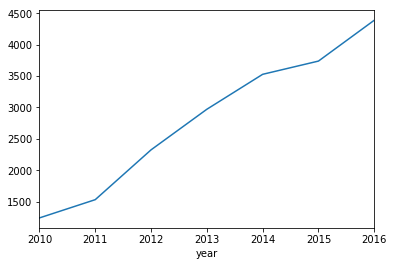

In [242]:
file_path = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfprice = sfo_data
sfprice.reset_index(inplace=True)
sfprice
sfpriceforrent = sfprice['gross_rent'].groupby(sfprice["year"]).mean()
sfpriceforrent
sfpriceforrent.plot()
#return pn.pane(sfpriceforrent.plot())

#average_gross_rent()

In [ ]:
# average_sales_price()

In [ ]:
# average_price_by_neighborhood()

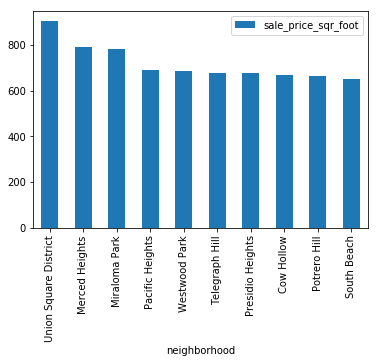

In [295]:
# top_most_expensive_neighborhoods()

file_path = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")    
topmost = sfo_data
topmost.reset_index(inplace=True)
topmost.drop(columns='year',inplace=True)

sfsqftNOText = sfo_data[['neighborhood','sale_price_sqr_foot']]
sales10NOText = sfo_data['housing_units']
sfpriceNOText = sfo_data['gross_rent']

sfallNOText = pd.concat([sfsqftNOText,sales10NOText,sfpriceNOText] , axis = "columns" , join="inner")
columnames=['neighborhood',"sale_price_sqr_foot","housing_units","gross_rent"]
sfallNOText.columns=columnames
    
grouper = ["neighborhood"]

sftop10= sfallNOText.groupby(grouper).mean()

sftop10 = sftop10.sort_values(['sale_price_sqr_foot'],ascending=False)

#sf10top10.reset_index(inplace=True)
sf10top10.plot(kind='bar',x="neighborhood",y='sale_price_sqr_foot')

In [ ]:
# most_expensive_neighborhoods_rent_sales()

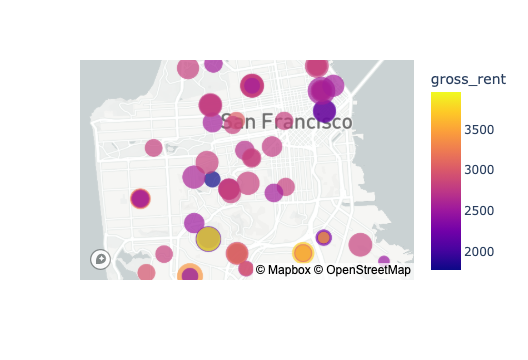

In [282]:
# neighborhood_map().show()


file_path = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")    
neigh_file_path = Path("/Users/jeremyseidman/Desktop/Trilogy/cu-nyc-virt-fin-pt-03-2021-u-c/02-Homework/06-PyViz/Instructions/Starter_Code/Data/neighborhoods_coordinates.csv")
neighcoords= pd.read_csv(neigh_file_path)

allbyneigh = sfo_data
allbyneigh.reset_index(inplace=True)
allbyneigh=allbyneigh.groupby(allbyneigh["neighborhood"]).mean()
allbyneigh["year"]=allbyneigh["year"].round(0).astype(int)
allbyneigh   
neighcoords.set_index("Neighborhood",inplace=True)
neighcoords
sfwithcoords = pd.concat([allbyneigh,neighcoords] , axis = 'columns' , join="inner")
sfwithcoords
sfrealmap = px.scatter_mapbox(sfwithcoords,
                    lat=sfwithcoords['Lat'],
                    lon=sfwithcoords['Lon'],
                    zoom=10.5,
                    color=sfwithcoords['gross_rent'],
                    size=sfwithcoords['sale_price_sqr_foot']
                    )

sfrealmap.show()

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()